# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 1.25.2 which is incompatible.
mizani 0.13.1 requires

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [27]:
# Import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from statsmodels.stats.proportion import proportions_ztest

## Reading the Data into a DataFrame

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ab_path = "/content/drive/MyDrive/Python Course/abtest.csv"
ab = pd.read_csv(ab_path)

Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# View the first rows
ab.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# View the last rows
ab.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# View the shape of the dataset
ab.shape

(100, 6)

In [7]:
# View dataset statistical summary
ab.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [8]:
# Check to ensure that the data types are as expected for each column, to find any data weirdness
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
# Check for any missing data
ab.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [10]:
# Check for duplicated data
duplicated_user_ids = ab[ab.duplicated(subset='user_id', keep=False)]['user_id'].unique()
print('Duplicates:', duplicated_user_ids)

Duplicates: []


### Univariate Analysis

group
control      50
treatment    50
Name: count, dtype: int64


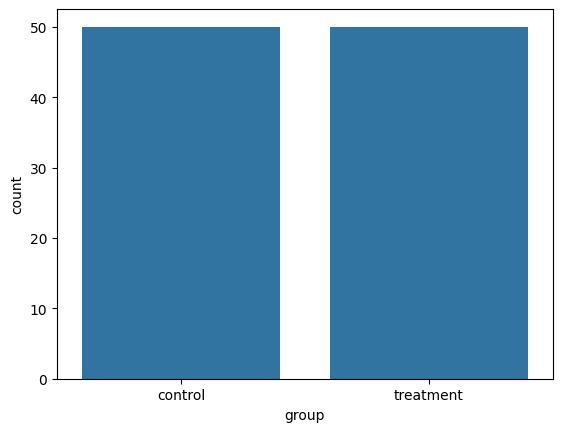

In [44]:
# View the group data
print(ab['group'].value_counts())
sns.countplot(data=ab,x='group')
plt.show()

landing_page
old    50
new    50
Name: count, dtype: int64


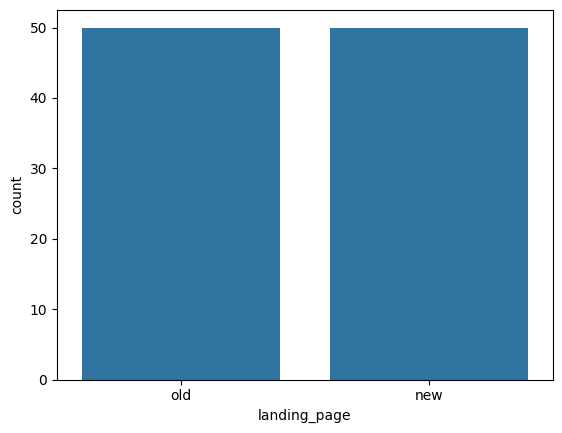

In [45]:
# View the landing page data
print(ab['landing_page'].value_counts())
sns.countplot(data=ab,x='landing_page')
plt.show()

converted
yes    54
no     46
Name: count, dtype: int64


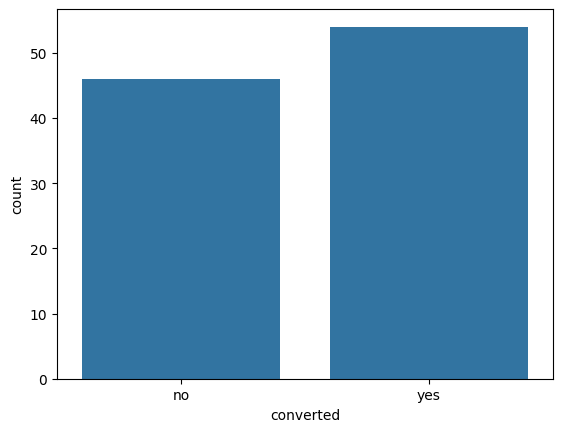

In [46]:
# View the converted data
print(ab['converted'].value_counts())
sns.countplot(data=ab,x='converted')
plt.show()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


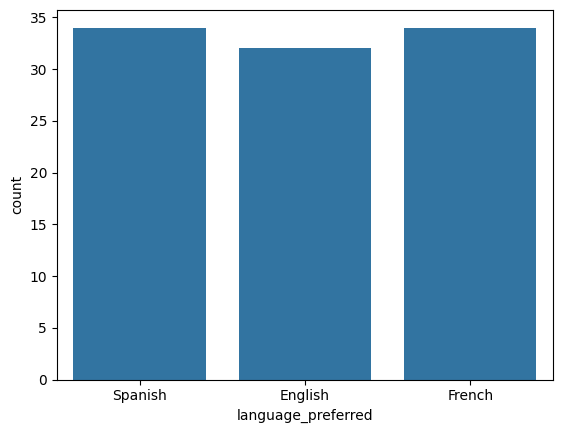

In [47]:
# View the language preferred data
print(ab['language_preferred'].value_counts())
sns.countplot(data=ab,x='language_preferred')
plt.show()

### Bivariate Analysis

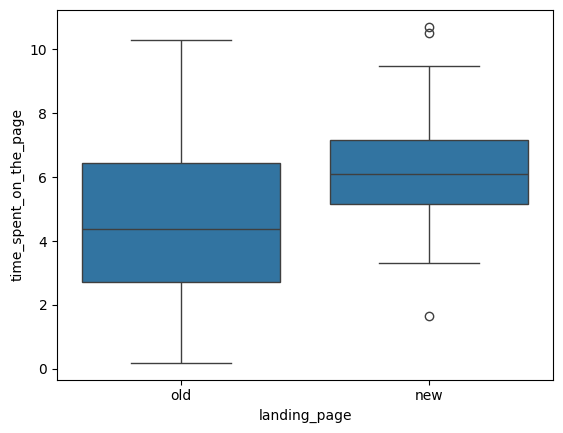

In [49]:
# View the relationship between landing page and time spent on the page
sns.boxplot(data=ab,x='landing_page',y='time_spent_on_the_page')
plt.show()

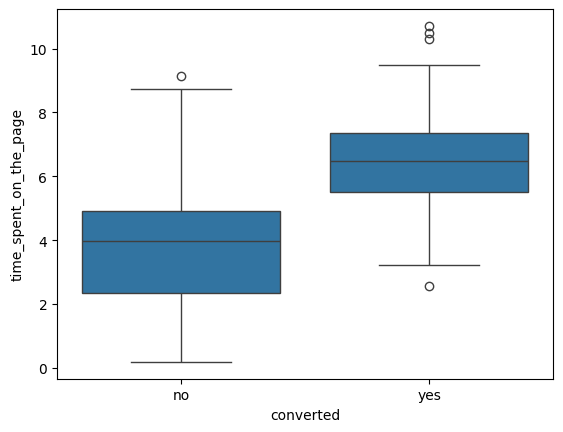

In [63]:
# View the relationship between conversion and time spent on the page
sns.boxplot(data=ab,x='converted',y='time_spent_on_the_page')
plt.show()

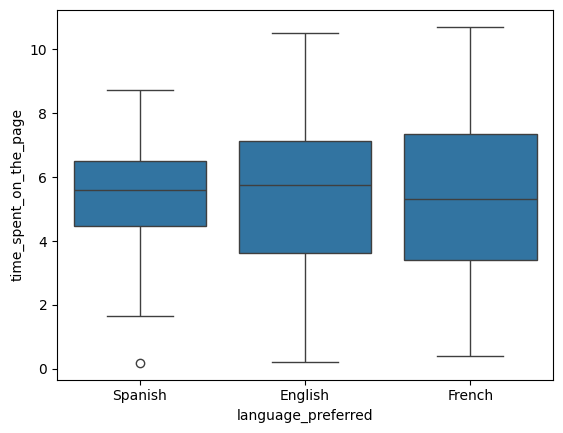

In [65]:
# View the relationship between language preference and time spent on the page
sns.boxplot(data=ab,x='language_preferred',y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

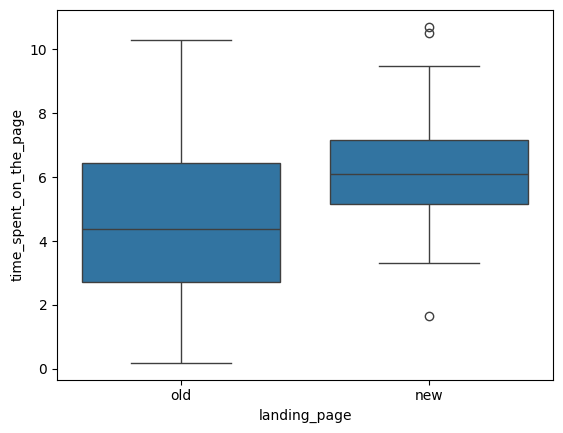

In [66]:
# boxplot of the time spent on the new page versus the old page
sns.boxplot(data=ab,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: Users will spend an equal or less amount of time on the new page as the old page. 𝜇1=𝜇2

Alternative Hypothesis: Users will spend more time on the new page than the old page. 𝜇1>𝜇2

### Step 2: Select Appropriate test

We are testing two independent, continuous sample means and don't know the std dev. This is a one-tailed test. Therefore, we should use the 2-sample T-Test.

### Step 3: Decide the significance level

As stated in the instructions, the level of significance for this analysis should be 0.05.

### Step 4: Collect and prepare data

In [11]:
# Prepare the data
new_time = ab[ab['landing_page'] == 'new']['time_spent_on_the_page']
old_time = ab[ab['landing_page'] == 'old']['time_spent_on_the_page']

# Determine if the std dev for the two samples is equal or not
# Since they are not equal, we will use equal_var = False in the t-test
print(round(new_time.mean(),2))
print(round(old_time.mean(),2))

6.22
4.53


### Step 5: Calculate the p-value

In [13]:
t_stat, p_value = stats.ttest_ind(new_time, old_time, equal_var=False, alternative = 'greater')
print('p-value:', p_value)

p-value: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [14]:
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### Step 7:  Draw inference

As we have rejected the null hypothesis, we can say with 95% certainty that users spend more time on average on the new landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Null Hypothesis: the conversion rate will be the same for the new page as the old page.  𝜇1=𝜇2

Alternative Hypothesis: the conversion rate will be greater for the new page than the old.  𝜇1>𝜇2


---

This is a one-tailed test involving two independent discrete sample populations, so we will use the 2-proportion z-test, with an alpha of 0.05.

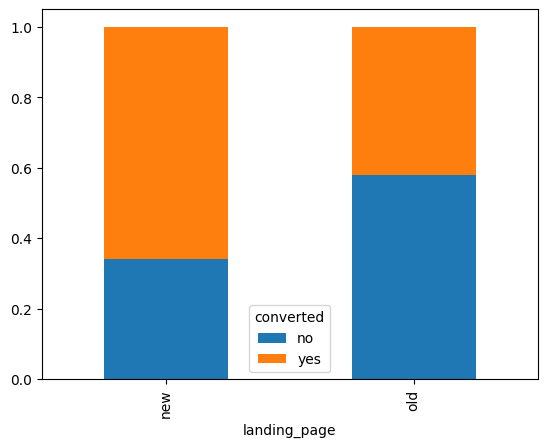

In [80]:
# Perform visual analysis with a crosstab of the conversion rate of the new page versus the old page
pd.crosstab(ab['landing_page'], ab['converted'], normalize='index').plot(kind='bar', stacked=True)
plt.show()

In [25]:
# calculate the number of converted users from the new page
c_new = ab[ab['landing_page'] == 'new']['converted'].value_counts()['yes']


# calculate the number of converted users from the old page
c_old = ab[ab['landing_page'] == 'old']['converted'].value_counts()['yes']

# Calculate the number of users sent to each page
n_new = ab.landing_page.value_counts()['new']
n_old = ab.landing_page.value_counts()['old']

print('The new page converted {0}/{1} users while the old page converted {2}/{3} users'.format(c_new, n_new, c_old, n_old ))

The new page converted 33/50 users while the old page converted 21/50 users


In [29]:
# Calculate the p-value and test the null hypothesis
test_stat, p_value = proportions_ztest([c_new, c_old], [n_new, n_old], alternative = 'larger')
print('The p-value is ' + str(p_value))

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

The p-value is 0.008026308204056278
Reject the null hypothesis


Based upon these results, we reject the null hypothesis that the conversion rate is the same between the two pages, and instead can state with 95% certainty that the new page has a higher average conversion rate.

---



## 3. Is the conversion and preferred language are independent or related?

Null Hypothesis: the conversion rate is independent of language.

Alternative Hypothesis: the conversion rate is dependent upon the language.


---


This is a bivariate test between more than 2 samples, so we will use the Chi Square test, with an alpha of 0.05.

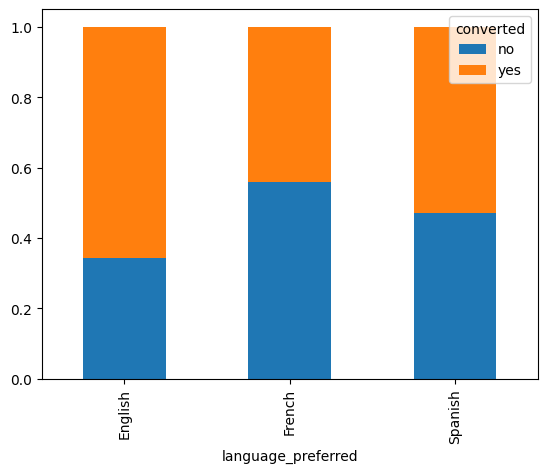

In [5]:
# Visual analysis of preferred language and converted
pd.crosstab(ab['language_preferred'], ab['converted'], normalize='index').plot(kind='bar', stacked=True)
plt.show()

In [99]:
# Prepare the data
contingency_table = pd.crosstab(ab['language_preferred'], ab['converted'])

# Calculate the p-value using the Chi Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('p-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value: 0.2129888748754345
Fail to reject the null hypothesis


Based upon these results, we fail to reject the null hypothesis that the conversion rate is independent of language preference, and can state with 95% certainty that the two things are independent.


## 4. Is the time spent on the new page same for the different language users?

Null Hypothesis: the time spent on the new page is independent of language.

Alternative Hypothesis: the time spent on the new page is affected by the language.


---


This is a bivariate test with one discrete and one continuous factor, and more than 2 samples.  Therefore, we should use the One-way ANOVA F-test.

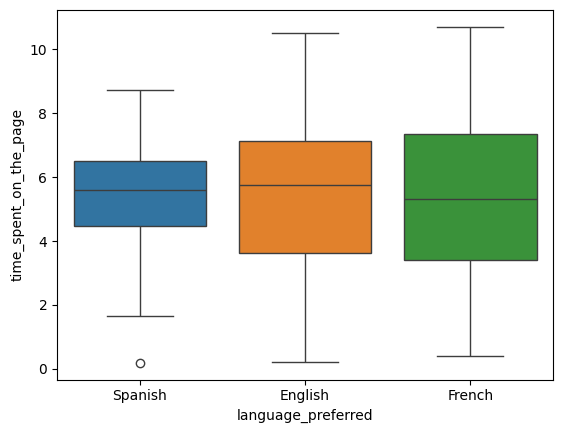

In [16]:
# Visual analysis of language versus time spent on the page
ab_new = ab[ab['landing_page'] == 'new']
sns.boxplot(data=ab_new,x='language_preferred',y='time_spent_on_the_page', hue = 'language_preferred')
plt.show()

In [17]:
# First, test for normality using Shapiro to ensure that we can use the ANOVA test
# The large p-value tells us that the data is adequately normal.
# find the p-value
w, p_value = stats.shapiro(ab_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


In [18]:
# Next, test the homogeneity of Variance using Levene
# The p-value larger than 0.05 tells us the variance is adequately homogenous.
statistic, p_value = stats.levene(ab_new['time_spent_on_the_page'][ab_new['language_preferred']=="Spanish"],
                                  ab_new['time_spent_on_the_page'][ab_new['language_preferred']=="French"],
                                  ab_new['time_spent_on_the_page'][ab_new['language_preferred']=="English"])

# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [19]:
# Since we passed the Shapiro and Levene tests, we can proceed with the ANOVA test
# Find the p-value using the ANOVA one-way test
test_stat, p_value = stats.f_oneway(ab_new.loc[ab_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                                     ab_new.loc[ab_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                                     ab_new.loc[ab_new['language_preferred'] == 'English', 'time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.43204138694325955


Since our calculated p-value is well above our alpha of 0.05, we fail to reject the null hypothesis.  We can conclude with 95% certainty that the time spent on the new page is independent of the language preferred.

## Conclusion and Business Recommendations

#Key Take Aways:

1. New page is more engaging: The new landing page is not only retaining users for a longer duration but also converting them at a higher rate. This suggests that users find the new page more engaging, effective, or relevant to their needs.
2. Language independence: The fact that both the time spent on the page and the conversion rates are independent of the language indicates that the design/content of the new page is universally effective across different language settings. This suggests that the improvements in user engagement and conversions are likely due to the design changes or user experience enhancements rather than language-specific factors.
3. Time spent on the page does not directly correlate with language: Since time spent is also independent of language, it further strengthens the case that the changes to the new page (e.g., layout, content, call-to-action, etc.) are the key drivers behind the improvements, not the language preferences of users.

#Recommendations to the Business:

1. Roll out the new page to all users:
Given that the new page is performing better in terms of both engagement (time spent) and conversion rates, and these results hold across different languages, you should consider rolling out the new page to all users. The improvements in performance seem to be robust regardless of language preferences.

2. Further investigate the content or design elements of the new page:
To understand what specifically about the new page is leading to higher conversion rates and more time spent, you should analyze the design elements, content, and user flow of the new page. Look at which parts of the page users are interacting with the most, whether there are any particular sections driving conversions, or if the new page has specific features (e.g., clearer call-to-action buttons, better visuals, improved navigation) that lead to better engagement.

3. Consider user personalization:
While language doesn’t seem to be a factor in how the new page is performing, it might still be worth exploring whether personalizing the content or design further (e.g., region-specific content, targeted offers) could increase conversions even more. However, the current data suggests that the new page design itself is likely the main driver of improvements, rather than language or region.

4. Monitor post-launch metrics:
After the new page is fully launched, continue to track long-term trends in time spent and conversion rates. It's also important to watch for any potential negative impacts that may arise over time, such as a drop in user satisfaction or engagement. A/B testing could continue to be useful for testing incremental improvements.

5. Use the results for future optimizations:
The findings from this A/B test can serve as a foundation for future iterations of landing pages or other areas of your website. If the new page is leading to better user experience and performance, consider applying similar design principles or content strategies to other parts of your site.

#Conclusion:
* The new landing page is a clear success in terms of both user engagement (more time spent) and conversion rates, and these improvements are independent of the language.
* You should roll out the new page to the broader audience and continue to monitor its performance.
* Use the insights gained from this test to optimize other aspects of the site and consider personalization in the future.

___